In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0',1: 'class_1', 2:'class_2'})

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

In [ ]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wine.isna().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64

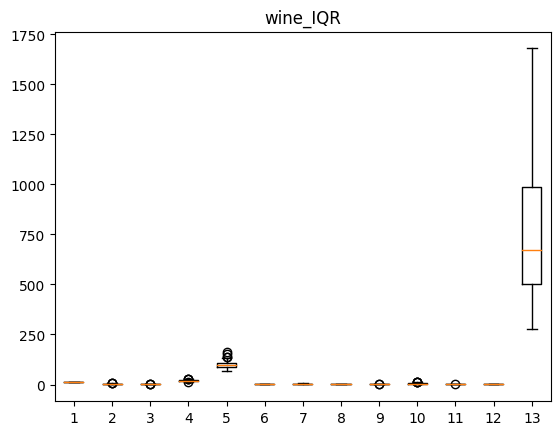

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(wine.drop(columns='Class'), whis = 1.5) #object 가 있으면 출력이 안되므로 삭제후 출력
plt.title('wine_IQR')
plt.show()

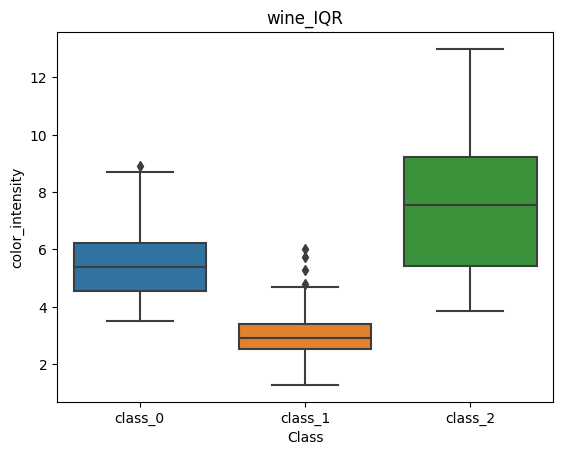

In [ ]:
import seaborn as sns
sns.boxplot(x='Class', y ='color_intensity', data = wine)
plt.title('wine_IQR')
plt.show()

In [ ]:
sns.pairplot(wine, diag_kind= 'auto', hue = 'Class') # sns는 시간이 2분 넘게 걸림 (도움말 sns.pairplot?)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##이상치 확인

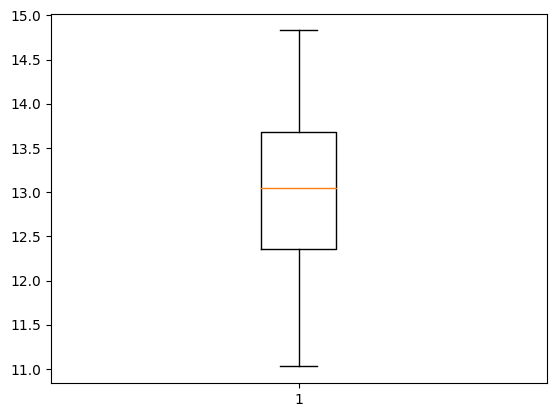

Series([], Name: alcohol, dtype: float64)


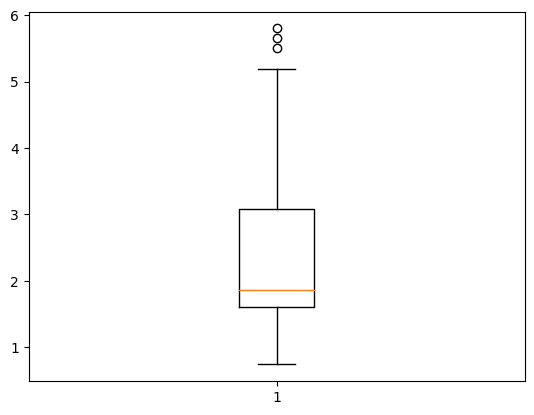

123    5.80
137    5.51
173    5.65
Name: malic_acid, dtype: float64


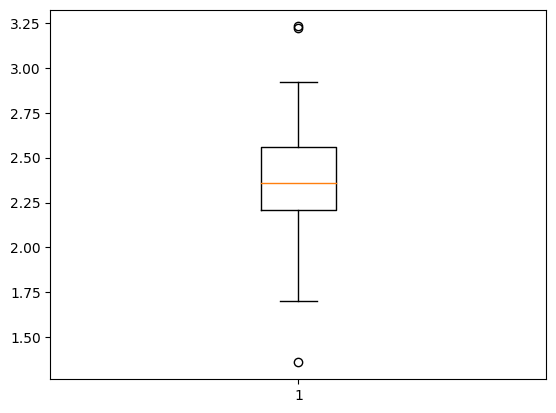

25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64


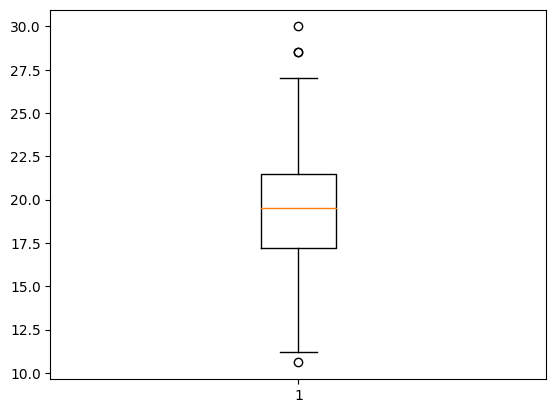

59     10.6
73     30.0
121    28.5
127    28.5
Name: alcalinity_of_ash, dtype: float64


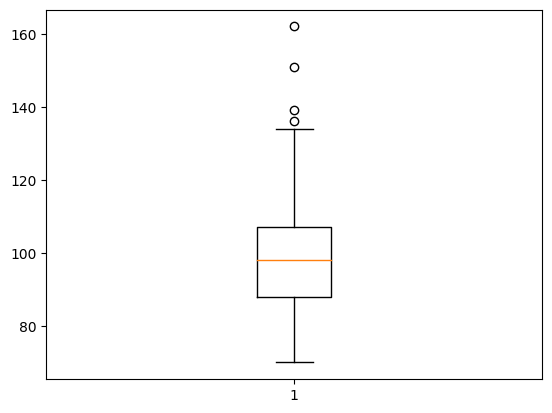

69    151.0
73    139.0
78    136.0
95    162.0
Name: magnesium, dtype: float64


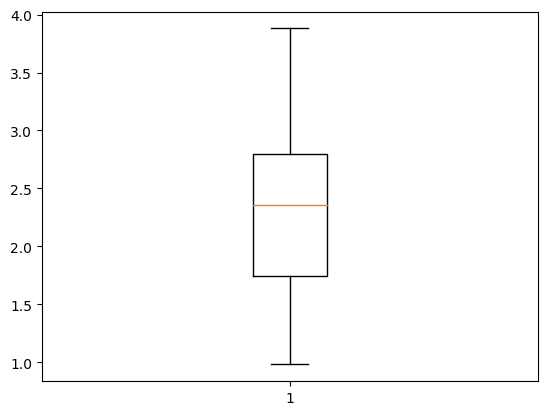

Series([], Name: total_phenols, dtype: float64)


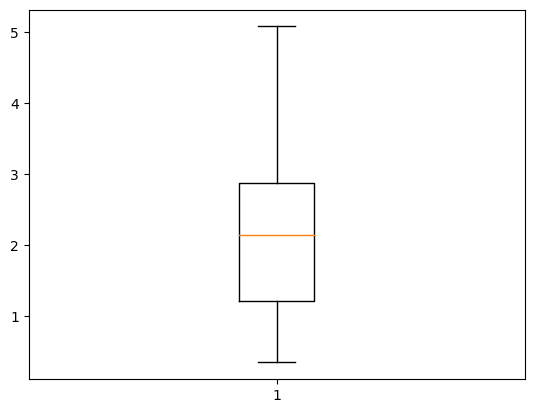

Series([], Name: flavanoids, dtype: float64)


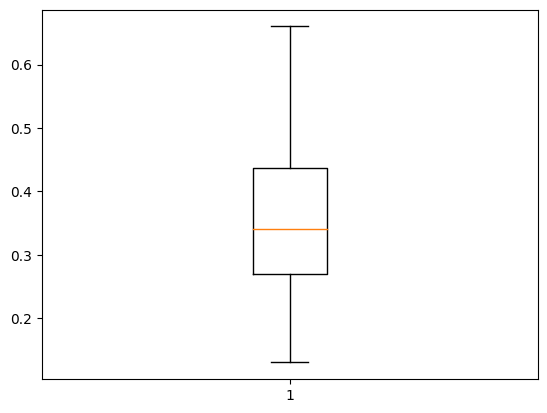

Series([], Name: nonflavanoid_phenols, dtype: float64)


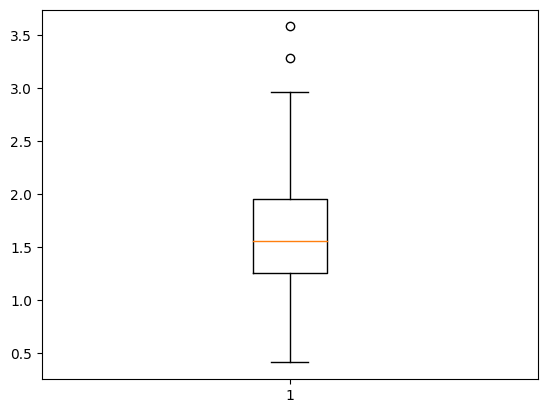

95     3.28
110    3.58
Name: proanthocyanins, dtype: float64


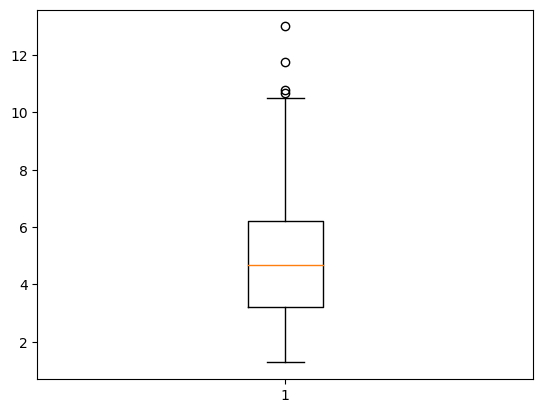

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64


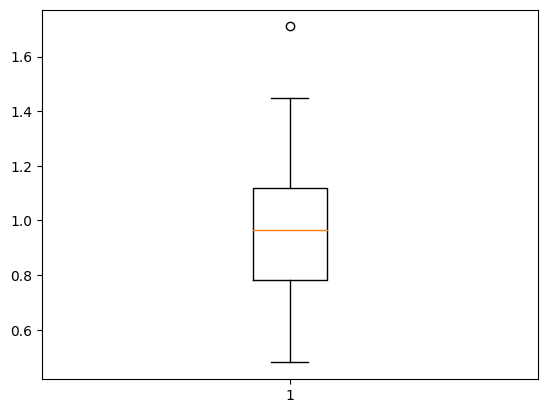

115    1.71
Name: hue, dtype: float64


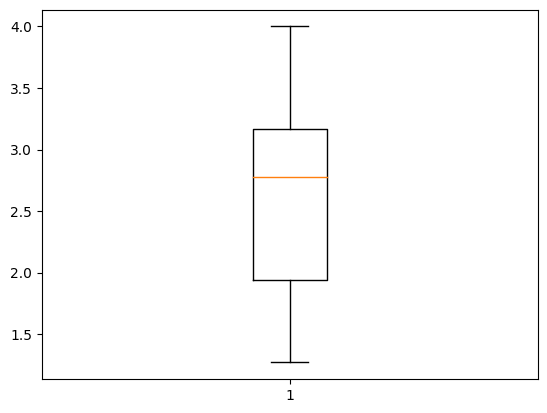

Series([], Name: od280/od315_of_diluted_wines, dtype: float64)


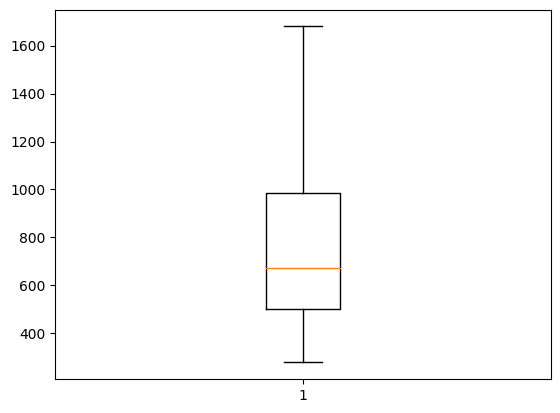

Series([], Name: proline, dtype: float64)


In [ ]:
import numpy as np #넘파이 사용 예시
def outliers_iqr_1(dt):
  column_names= dt.select_dtypes(exclude=['object'])
  column_names = column_names.columns.tolist()
  for i in column_names:
    quantile_1, quantile_3 = np.percentile(dt[i], [25, 75])
    iqr = quantile_3 - quantile_1
    lower_whis = quantile_1 - (iqr * 1.5)
    upper_whis = quantile_3 + (iqr * 1.5)
    outliers = dt[(dt[i] > upper_whis) | (dt[i] < lower_whis)]
    plt.boxplot(dt[i])
    plt.show()
    print(outliers[i])

outliers_iqr_1(wine)


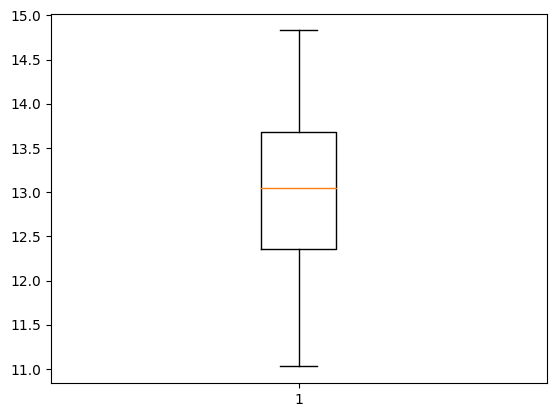

Series([], Name: alcohol, dtype: float64)


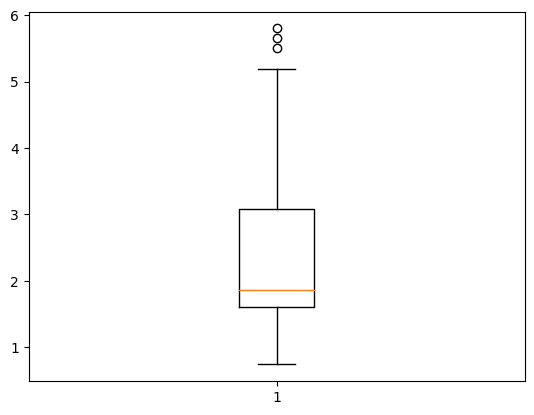

123    5.80
137    5.51
173    5.65
Name: malic_acid, dtype: float64


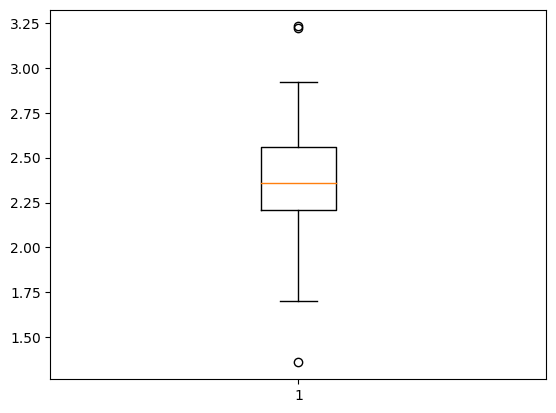

25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64


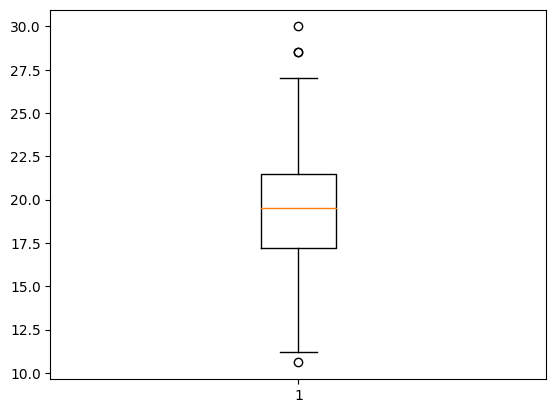

59     10.6
73     30.0
121    28.5
127    28.5
Name: alcalinity_of_ash, dtype: float64


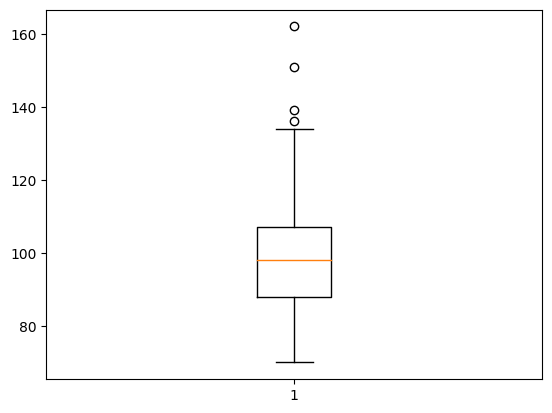

69    151.0
73    139.0
78    136.0
95    162.0
Name: magnesium, dtype: float64


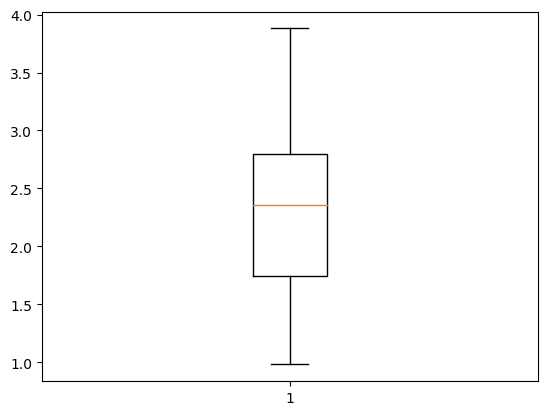

Series([], Name: total_phenols, dtype: float64)


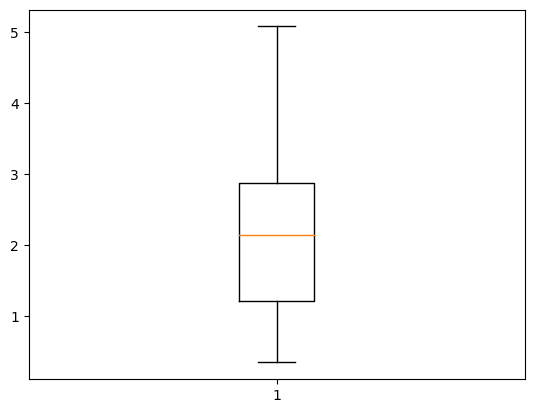

Series([], Name: flavanoids, dtype: float64)


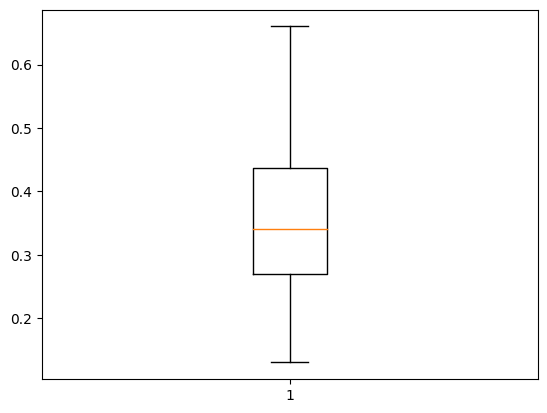

Series([], Name: nonflavanoid_phenols, dtype: float64)


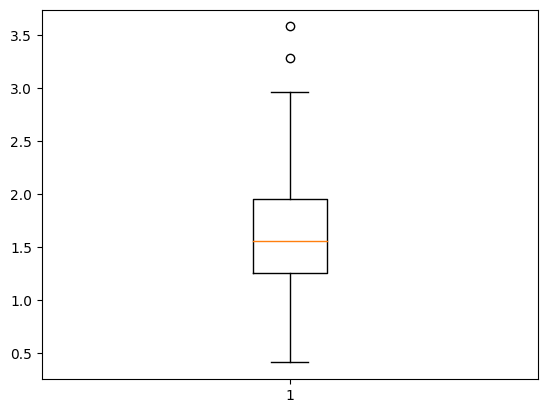

95     3.28
110    3.58
Name: proanthocyanins, dtype: float64


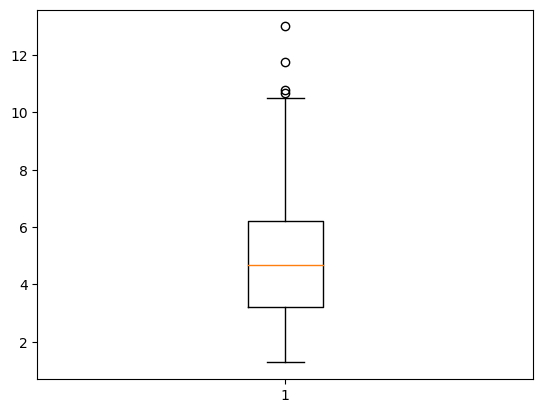

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64


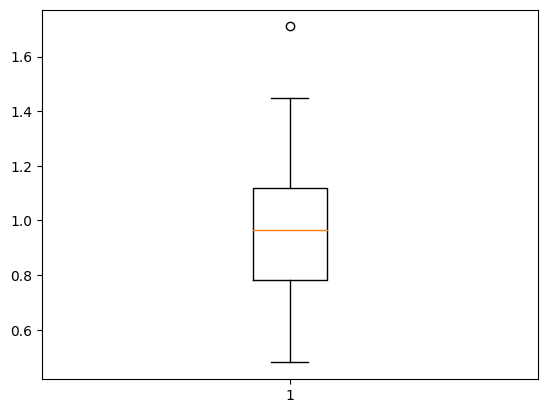

115    1.71
Name: hue, dtype: float64


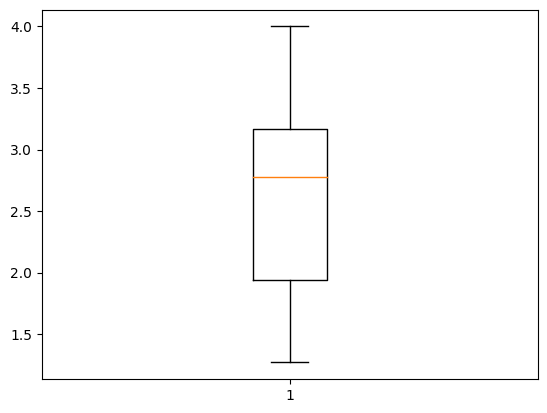

Series([], Name: od280/od315_of_diluted_wines, dtype: float64)


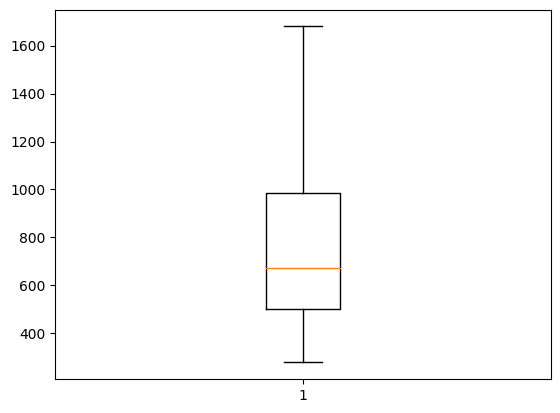

Series([], Name: proline, dtype: float64)


In [ ]:
import pandas as pd #판다스 사용 예시
def outliers_iqr_2(df):
  column_names= df.select_dtypes(exclude=['object'])
  column_names = column_names.columns.tolist()
  for i in column_names:
    quantile_1,quantile_3= df[i].quantile(0.25),df[i].quantile(0.75)   # 1st quartile
    iqr = quantile_3 - quantile_1
    lower_whis = quantile_1 - (iqr * 1.5)
    upper_whis = quantile_3 + (iqr * 1.5)
    outliers = df[(df[i] > upper_whis) | (df[i] < lower_whis)]
    plt.boxplot(df[i])
    plt.show()
    print(outliers[i])

outliers_iqr_2(wine)

In [ ]:
column_names= wine.select_dtypes(exclude=['object'])
column_names = column_names.columns.tolist()
print(column_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Column: alcohol
Series([], Name: alcohol, dtype: float64)
Column: malic_acid
123    5.80
137    5.51
173    5.65
Name: malic_acid, dtype: float64
Column: ash
25     3.22
59     1.36
121    3.23
Name: ash, dtype: float64
Column: alcalinity_of_ash
59     10.6
73     30.0
121    28.5
127    28.5
Name: alcalinity_of_ash, dtype: float64
Column: magnesium
69    151.0
73    139.0
78    136.0
95    162.0
Name: magnesium, dtype: float64
Column: total_phenols
Series([], Name: total_phenols, dtype: float64)


<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

Column: flavanoids
Series([], Name: flavanoids, dtype: float64)
Column: nonflavanoid_phenols
Series([], Name: nonflavanoid_phenols, dtype: float64)
Column: proanthocyanins
95     3.28
110    3.58
Name: proanthocyanins, dtype: float64
Column: color_intensity
151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64
Column: hue
115    1.71
Name: hue, dtype: float64
Column: od280/od315_of_diluted_wines
Series([], Name: od280/od315_of_diluted_wines, dtype: float64)
Column: proline
Series([], Name: proline, dtype: float64)


<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append(outliers)
<ipython-input-115-08b5da8aa4ca>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

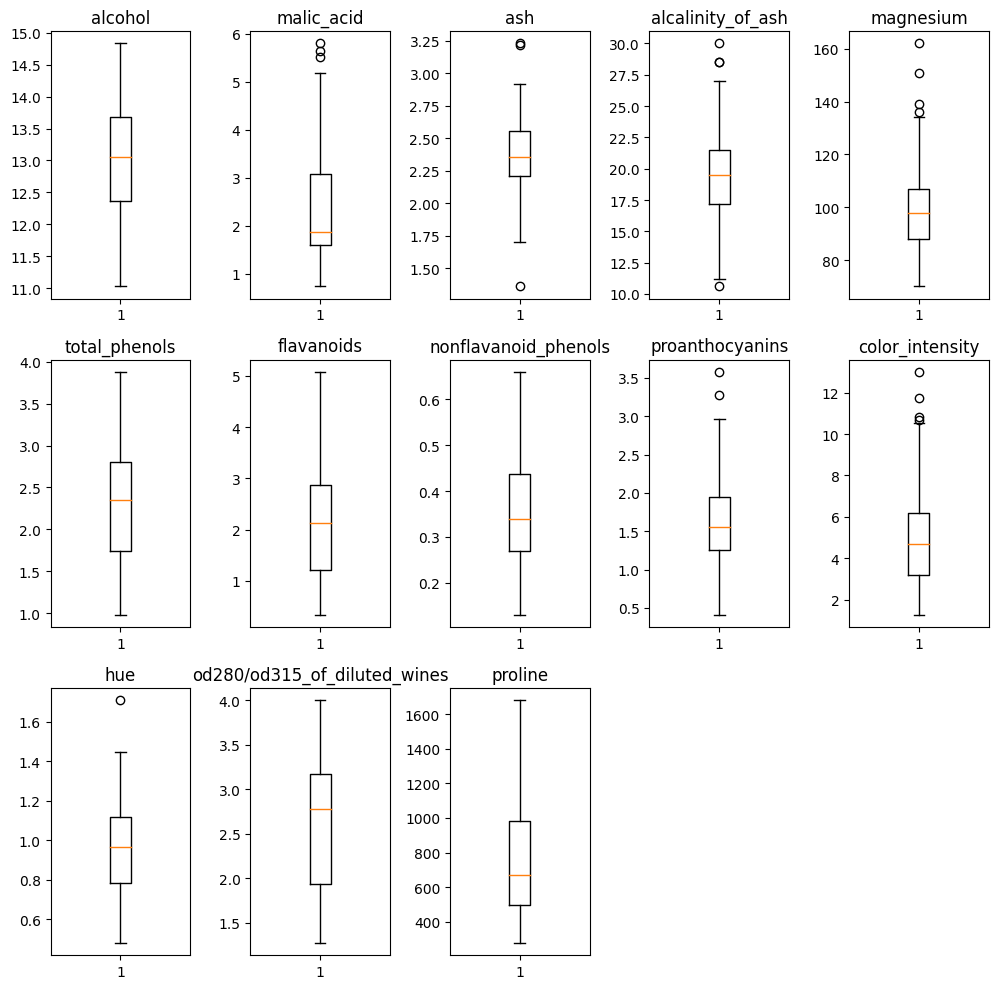

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
123    13.05        5.80  2.13               21.5       86.0           2.62   
137    12.53        5.51  2.64               25.0       96.0           1.79   
173    13.71        5.65  2.45               20.5       95.0           1.68   
25     13.05        2.05  3.22               25.0      124.0           2.63   
59     12.37        0.94  1.36               10.6       88.0           1.98   
121    11.56        2.05  3.23               28.5      119.0           3.18   
59     12.37        0.94  1.36               10.6       88.0           1.98   
73     12.99        1.67  2.60               30.0      139.0           3.30   
121    11.56        2.05  3.23               28.5      119.0           3.18   
127    11.79        2.13  2.78               28.5       92.0           2.13   
69     12.21        1.19  1.75               16.8      151.0           1.85   
73     12.99        1.67  2.60               30.0   

In [ ]:
def outliers_iqr_3(df):
    numeric_columns = df.select_dtypes(exclude=['object'])
    column_names = numeric_columns.columns.tolist()

    # 서브플롯의 행, 열 개수 및 초기화
    num_rows = int(len(column_names)/4)
    num_cols = int(len(column_names)/num_rows) +1
    plt.figure(figsize=(10, 10))
    outliers_df = pd.DataFrame()


    for idx, i in enumerate(column_names):
        quantile_1, quantile_3 = df[i].quantile(0.25), df[i].quantile(0.75)
        iqr = quantile_3 - quantile_1
        lower_whis = quantile_1 - (iqr * 1.5)
        upper_whis = quantile_3 + (iqr * 1.5)

        # 이상치 데이터 추출
        outliers = df[(df[i] > upper_whis) | (df[i] < lower_whis)]
        outliers_df = outliers_df.append(outliers)
        # 서브플롯 생성 및 박스 플롯 그리기
        plt.subplot(num_rows, num_cols, idx + 1)
        plt.boxplot(df[i])
        plt.title(f'{i}')

        print(f"Column: {i}")
        print(outliers[i])

    plt.tight_layout()
    plt.show()
    return outliers_df # return 을 통해 outliers 를 반환

outliers =outliers_iqr_3(wine)
outliers
print(outliers)

### copy.copy(original_list) 얕은 복사:  얕은 복사는 객체의 하위 요소들의 참조를 그대로 복사
### copy.deepcopy(original_list) 깊은 복사: 완전히 새로운 객체 복사된 객체와 원본 객체는 완전히 독립적

In [ ]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN

wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean()) # 평균값을 대치한 후 wine['color_intensity']에 다시 할당해야 원본이 바뀜
wine.loc[outliers.index, 'color_intensity']

123    5.014161
137    5.014161
173    5.014161
25     5.014161
59     5.014161
121    5.014161
59     5.014161
73     5.014161
121    5.014161
127    5.014161
69     5.014161
73     5.014161
78     5.014161
95     5.014161
95     5.014161
110    5.014161
151    5.014161
158    5.014161
159    5.014161
166    5.014161
115    5.014161
Name: color_intensity, dtype: float64

In [ ]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers', drop_outliers.shape)

Original : (178, 14)
Drop outliers (161, 14)


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2: 'Virginica'})
iris_dummy = pd.get_dummies(iris, columns = ['Class'])
iris_dummy


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
import pandas as np
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1: 'Versicolour', 2: 'Virginica'})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.drop(columns = 'Class'), iris['Class'], test_size = 0.2, random_state = 1004)
print('X_train: ', X_train.shape, 'X_test : ', X_test.shape)
print('Y_train:', Y_train.shape, 'Y_test:', Y_test.shape)

X_train:  (120, 4) X_test :  (30, 4)
Y_train: (120,) Y_test: (30,)


In [ ]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [ ]:
Y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: Class, dtype: object

In [ ]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [ ]:
Y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [ ]:
Y_test.value_counts()

Virginica      11
Setosa         10
Versicolour     9
Name: Class, dtype: int64

### Class 를 기준으로 데이터 층화임의 추출방식 데이터 분할
###stratify (array-like or None, default=None):분리할 데이터의 클래스 비율을 유지하도록 설정. 이 값을 설정하면 훈련 세트와 테스트 세트가 전체 데이터의 클래스 비율을 반영

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'), iris['Class'], test_size = 0.2, random_state = 1004, stratify = iris['Class'])
print('X_train :', X_train.shape, 'X_test:', X_test.shape )
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train : (120, 4) X_test: (30, 4)
y_train: (120,) y_test: (30,)


In [ ]:
y_train.value_counts()

Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64